## 1. EDA(Class 별 분포 확인) 및 샘플 데이터 추출

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import cv2
import os
import json

In [3]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
DATA_PATH = '...'
TRAIN_PATH = DATA_PATH + 'train/'
TEST_PATH = DATA_PATH + 'test/'
LABELS_PATH = DATA_PATH + 'labels/train.json'

train_imgs = [TRAIN_PATH + file_name for file_name in os.listdir(TRAIN_PATH) if file_name != '.DS_Store']
test_imgs = [TEST_PATH + file_name for file_name in os.listdir(TEST_PATH) if file_name != '.DS_Store']

train_imgs = sorted(train_imgs)
test_imgs = sorted(test_imgs)

print(len(train_imgs), len(test_imgs)) # 학습, 테스트 데이터 수

104875 44946


In [ ]:
with open(LABELS_PATH, 'r', encoding='UTF8') as f:
    lab = json.load(f)
display(lab)

In [11]:
len(lab['images']), len(lab['annotations']) # 파일은 10만개지만 annotation은 6000개. 그 중에 하나의 이미지에 여러개의 객체가 있다면 객체가있는 파일은 더 적음.

(104875, 6301)

In [12]:
lab['annotations'][1]

{'id': 5,
 'image_id': 283,
 'category_id': 5,
 'segmentation': [],
 'area': 50205.870400000014,
 'bbox': [57.07, 247.17, 384.16, 130.69],
 'iscrowd': 0,
 'attributes': {'occluded': False, 'rotation': 0.0}}

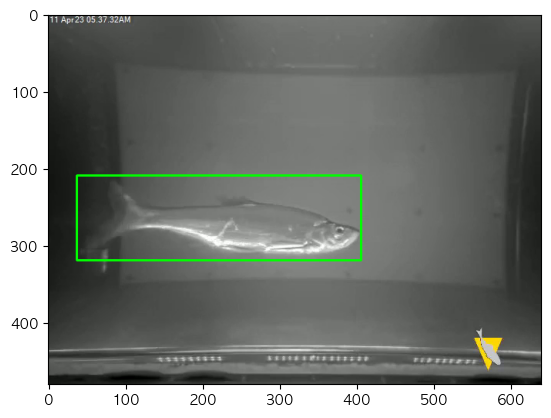

In [13]:
img = cv2.imread(train_imgs[0])
img_idx = lab['images'][0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# [x0, y0, w, h]
x = int(lab['annotations'][0]['bbox'][0])
y = int(lab['annotations'][0]['bbox'][1])
w = int(lab['annotations'][0]['bbox'][2])
h = int(lab['annotations'][0]['bbox'][3])

cv2.rectangle(img, (x,y), (x+w,y+h), color = (0, 255, 0), thickness=2)
plt.imshow(img)

In [14]:
l1 = []
for val in lab['annotations']:
    l1.append(val['image_id'])
l1 = pd.Series(l1).value_counts().sort_values(ascending=False)
l1.head() # 한 이미지에 다양한 객체가 포함된 경우도 있음.

63913    8
63908    8
63911    7
63909    7
63113    7
Name: count, dtype: int64

In [15]:
img_id = l1[l1 == 2].index[0] # 하나의 이미지에 2개 객체가 포함된 image의 id
for idx, val in enumerate(lab['annotations']):
    if val['image_id'] == img_id:
        print(idx)
        print(val) # 파일 id와 index가 일치하는 것도 아님.

2002
{'id': 2841, 'image_id': 63559, 'category_id': 4, 'segmentation': [], 'area': 17157.7809, 'bbox': [96.68, 289.69, 185.63, 92.43], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}
2003
{'id': 2842, 'image_id': 63559, 'category_id': 1, 'segmentation': [], 'area': 30414.106200000006, 'bbox': [270.66, 286.58, 285.82, 106.41], 'iscrowd': 0, 'attributes': {'occluded': False, 'rotation': 0.0}}


In [16]:
for i in lab['images']:
    if i['id'] == img_id:
        print(i)
        file_name = (i['file_name'])

{'id': 63559, 'width': 640, 'height': 480, 'file_name': 'train_44587.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}


In [17]:
lab['images'][img_id] # 파일 순서와 id가 일치하는 것은 아님.

{'id': 90600,
 'width': 640,
 'height': 480,
 'file_name': 'train_63559.png',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

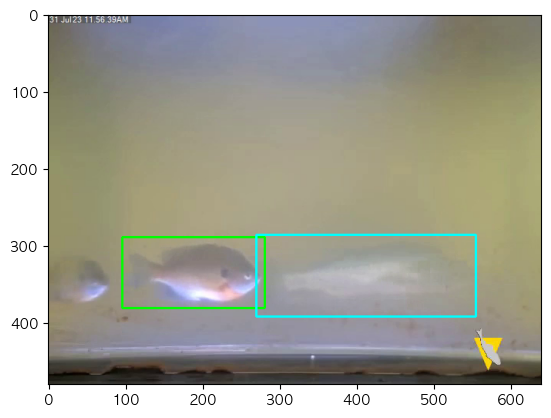

In [18]:
img = cv2.imread(TRAIN_PATH + file_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# [x0, y0, w, h]
x = int(lab['annotations'][2002]['bbox'][0])
y = int(lab['annotations'][2002]['bbox'][1])
w = int(lab['annotations'][2002]['bbox'][2])
h = int(lab['annotations'][2002]['bbox'][3])

x2 = int(lab['annotations'][2003]['bbox'][0])
y2 = int(lab['annotations'][2003]['bbox'][1])
w2 = int(lab['annotations'][2003]['bbox'][2])
h2 = int(lab['annotations'][2003]['bbox'][3])

cv2.rectangle(img, (x,y), (x+w,y+h), color = (0, 255, 0), thickness=2)
cv2.rectangle(img, (x2,y2), (x2+w2,y2+h2), color = (0, 255, 255), thickness=2)
plt.imshow(img)

In [20]:
# 카테고리별 분포
classes_col = pd.Series([x['category_id'] for x in lab['annotations']])
display(classes_col.value_counts(normalize=True))

1    0.372004
3    0.338359
2    0.103317
7    0.093001
0    0.028567
5    0.025234
6    0.023488
4    0.016029
Name: proportion, dtype: float64

,class_id,count,name
4,0,180,농어
0,1,2344,베스
2,2,651,숭어
1,3,2132,강준치
7,4,101,블루길
5,5,159,잉어
6,6,148,붕어
3,7,586,누치


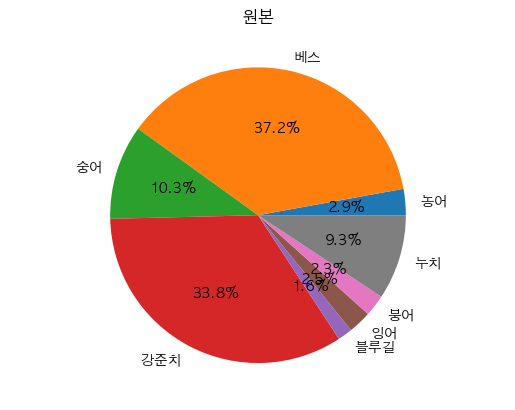

In [21]:
# 원본 데이터 class 갯수 DF 생성
origin_classes_df = pd.DataFrame(classes_col.value_counts()).reset_index()
origin_classes_df.columns = ['class_id', 'count']
origin_classes_df.loc[origin_classes_df.class_id == 0, 'name'] = '농어'
origin_classes_df.loc[origin_classes_df.class_id == 1, 'name'] = '베스'
origin_classes_df.loc[origin_classes_df.class_id == 2, 'name'] = '숭어'
origin_classes_df.loc[origin_classes_df.class_id == 3, 'name'] = '강준치'
origin_classes_df.loc[origin_classes_df.class_id == 4, 'name'] = '블루길'
origin_classes_df.loc[origin_classes_df.class_id == 5, 'name'] = '잉어'
origin_classes_df.loc[origin_classes_df.class_id == 6, 'name'] = '붕어'
origin_classes_df.loc[origin_classes_df.class_id == 7, 'name'] = '누치'
origin_classes_df.sort_values('class_id', inplace=True)
display(origin_classes_df)

plt.title('원본')
plt.axis('equal')
plt.pie(origin_classes_df['count'], labels=origin_classes_df['name'], autopct='%1.1f%%')
plt.show()

In [22]:
# annotation이 있는 파일들 추가
# 샘플링. annotations이 있는 파일 전부를 추출하고, 없는 파일을 조금 추가하자.
ann_files = []
for val in lab['images']:
    if val['id'] in l1.index:
        ann_files.append(val['file_name'])

print(len(ann_files)) # 총 5561 개의 파일에 annotation 되어있음. 나머지는 객체가 없는 파일
print(ann_files[:5]) 

5561
['train_0.png', 'train_185.png', 'train_186.png', 'train_192.png', 'train_194.png']


In [23]:
# annotations이 없는 배경 이미지 샘플링 + 객체가 존재하는 데이터
import random
random.seed(42)

sample_list = [x.split('/')[-1] for x in train_imgs if x.split('/')[-1] not in ann_files]
sample_list = random.sample(sample_list, 5000)
display(sample_list[:5])
sample_file = ann_files + sample_list
display(sample_file[:5])
print(len(sample_file))

['train_85375.png',
 'train_19384.png',
 'train_103039.png',
 'train_98007.png',
 'train_3902.png']

['train_0.png',
 'train_185.png',
 'train_186.png',
 'train_192.png',
 'train_194.png']

10561


## 2. YOLO 형식 라벨 데이터 생성 및 Train/Val 분리

In [ ]:
# coco json을 yolo 포멧으로 쉽게 변환해주는 툴 사용. https://developnote-blog.tistory.com/162
!git clone https://github.com/ssaru/convert2Yolo
!cd convert2Yolo
!pip install -r requirements.txt

In [ ]:
# 데이터셋을 convert2Yolo 폴더 내로 복사하고 파일 경로를 지정해서 원하는 경로에 label 파일 생성
!python3 example.py --datasets COCO --img_path ./train/ --label ./train.json --convert_output_path ./labels --img_type ".png" --manifest_path ./ --cls_list_file ./class.names

In [24]:
# 라벨이 잘 변환되었는지 확인
label_df = pd.DataFrame(columns = ['id', 'x', 'y', 'w', 'h'])
for idx, file in enumerate(sorted(os.listdir(DATA_PATH + 'all_labels'))[:10]):
    #print(file)
    label_df = pd.concat([label_df, pd.read_csv(DATA_PATH + 'all_labels/' + file, sep=' ', names = label_df.columns)])
    label_df.reset_index(drop=True, inplace=True)
    label_df.loc[idx, 'file'] = file.split('.')[0] + '.png'

label_df.head()

/var/folders/7d/_f3p3jgj74s_v7hf1tmxzxb40000gn/T/ipykernel_18315/1930524479.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  label_df = pd.concat([label_df, pd.read_csv(DATA_PATH + 'all_labels/' + file, sep=' ', names = label_df.columns)])


,id,x,y,w,h,file
0,3,0.348,0.553,0.577,0.231,train_0.png
1,4,0.790,0.679,0.239,0.111,train_10001.png
2,3,0.401,0.625,0.237,0.113,train_100242.png
3,3,0.582,0.495,0.200,0.110,train_100243.png
4,3,0.473,0.554,0.246,0.126,train_10027.png


In [25]:
# category id는 잘 변환되었고
label_test = lab['annotations'][0]
display(label_test)

# bbox도
x = label_test['bbox'][0]    # 좌측 최상단 x좌표
y = label_test['bbox'][1]    # 좌측 최상단 y좌표
w = label_test['bbox'][2]   # Box 가로
h = label_test['bbox'][3]   # Box 세로

image_width = 640
image_height = 480

x_center = round((x + w / 2) / image_width, 3)
y_center = round((y + h / 2) / image_height, 3)
bbox_width = round(w / image_width, 3)
bbox_height = round(h / image_height, 3)

print(x_center, y_center, bbox_width, bbox_height) # 잘 변환된 것을 확인할 수 있다.

{'id': 1,
 'image_id': 1,
 'category_id': 3,
 'segmentation': [],
 'area': 40939.4791,
 'bbox': [37.98, 209.94, 369.19, 110.89],
 'iscrowd': 0,
 'attributes': {'occluded': False, 'rotation': 0.0}}

0.348 0.553 0.577 0.231


### 3. Train/Val 나누기

In [26]:
# 샘플 df 구축
sample_df = pd.DataFrame(sample_file, columns = ['file_path'])
sample_df['file_path'] = TRAIN_PATH + sample_df.file_path
sample_df['label_path'] = sample_df.file_path.apply(lambda x: x.replace('train/', 'all_labels/'))
sample_df['label_path'] = sample_df.label_path.apply(lambda x: x.replace('png', 'txt'))
sample_df.reset_index(drop=True, inplace=True)
display(sample_df.head())
display(sample_df.file_path[0])
display(sample_df.label_path[0])
print(len(sample_df))
sample_df.to_csv('sample_df.csv', index=False) # 샘플링 된 이미지와 라벨이 담긴 csv

,file_path,label_path
0,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
1,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
2,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
3,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
4,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...


'/Users/kimhyeonseung/Desktop/hs/project/fish/train/train_0.png'

'/Users/kimhyeonseung/Desktop/hs/project/fish/all_labels/train_0.txt'

10561


In [27]:
from sklearn.model_selection import train_test_split

sample_train, sample_val = train_test_split(sample_df, test_size=0.1, random_state=42)
sample_train.reset_index(drop=True, inplace=True)
sample_val.reset_index(drop=True, inplace=True)
print(len(sample_train), len(sample_val))
display(sample_train.head())
display(sample_val.head())

9504 1057


,file_path,label_path
0,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
1,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
2,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
3,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
4,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...


,file_path,label_path
0,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
1,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
2,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
3,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...
4,/Users/kimhyeonseung/Desktop/hs/project/fish/t...,/Users/kimhyeonseung/Desktop/hs/project/fish/a...


In [28]:
print(sample_train.file_path[100])
print(sample_train.label_path[100])
print(sample_val.file_path[100])
print(sample_val.label_path[100])

/Users/kimhyeonseung/Desktop/hs/project/fish/train/train_73695.png
/Users/kimhyeonseung/Desktop/hs/project/fish/all_labels/train_73695.txt
/Users/kimhyeonseung/Desktop/hs/project/fish/train/train_34255.png
/Users/kimhyeonseung/Desktop/hs/project/fish/all_labels/train_34255.txt


In [29]:
# 카테고리 잘 분류되어있나 확인
sample_image_ids = []
sample_list = [x.split('/')[-1] for x in sample_train.file_path] # 파일 이름만 추출


for val in lab['images']:
    if val['file_name'] in sample_list:
        sample_image_ids.append(val['id']) # sample_list의 file들의 image id 저장

sample_annotations = []
for val in lab['annotations']:
    if val['image_id'] in sample_image_ids:
        sample_annotations.append(val['category_id']) # image id를 annotations의 image id와 비교후 일치하면 category id 저장


,class_id,count,name
4,0,159,농어
0,1,2105,베스
2,2,585,숭어
1,3,1933,강준치
7,4,93,블루길
5,5,139,잉어
6,6,132,붕어
3,7,528,누치


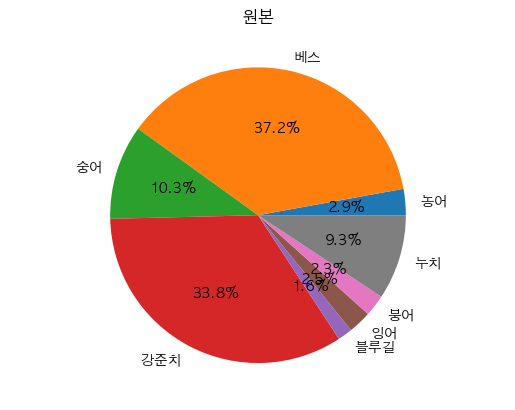

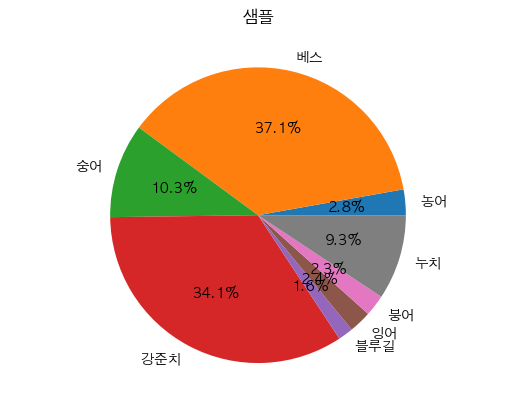

In [30]:
# 샘플 데이터 class 갯수 DF 생성
sample_classes_df = pd.DataFrame(pd.Series(sample_annotations).value_counts()).reset_index()
sample_classes_df.columns = ['class_id', 'count']
sample_classes_df.loc[sample_classes_df.class_id == 0, 'name'] = '농어'
sample_classes_df.loc[sample_classes_df.class_id == 1, 'name'] = '베스'
sample_classes_df.loc[sample_classes_df.class_id == 2, 'name'] = '숭어'
sample_classes_df.loc[sample_classes_df.class_id == 3, 'name'] = '강준치'
sample_classes_df.loc[sample_classes_df.class_id == 4, 'name'] = '블루길'
sample_classes_df.loc[sample_classes_df.class_id == 5, 'name'] = '잉어'
sample_classes_df.loc[sample_classes_df.class_id == 6, 'name'] = '붕어'
sample_classes_df.loc[sample_classes_df.class_id == 7, 'name'] = '누치'
sample_classes_df.sort_values('class_id', inplace=True)
display(sample_classes_df)

plt.title('원본')
plt.axis('equal')
plt.pie(origin_classes_df['count'], labels=origin_classes_df['name'], autopct='%1.1f%%')
plt.show()


# 원본과 크게 차이나지않기때문에 그대로 사용.
plt.title('샘플')
plt.axis('equal')
plt.pie(sample_classes_df['count'], labels=sample_classes_df['name'], autopct='%1.1f%%')
plt.show()

,class_id,count,name
4,0,21,농어
0,1,239,베스
2,2,66,숭어
1,3,199,강준치
7,4,8,블루길
5,5,20,잉어
6,6,16,붕어
3,7,58,누치


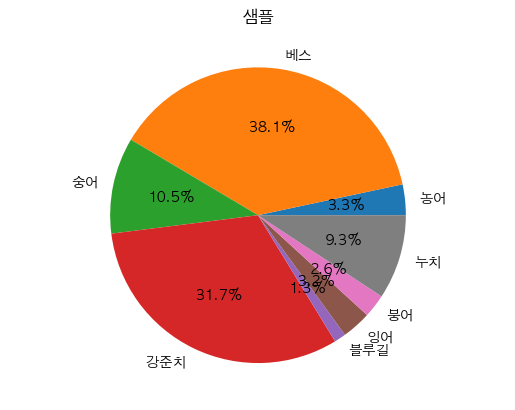

In [31]:
# 카테고리 잘 분류되어있나 확인
sample_image_ids = []
sample_list = [x.split('/')[-1] for x in sample_val.file_path] # 파일 이름만 추출


for val in lab['images']:
    if val['file_name'] in sample_list:
        sample_image_ids.append(val['id']) # sample_list의 file들의 image id 저장

sample_annotations = []
for val in lab['annotations']:
    if val['image_id'] in sample_image_ids:
        sample_annotations.append(val['category_id']) # image id를 annotations의 image id와 비교후 일치하면 category id 저장


# 샘플 데이터 class 갯수 DF 생성
sample_classes_df = pd.DataFrame(pd.Series(sample_annotations).value_counts()).reset_index()
sample_classes_df.columns = ['class_id', 'count']
sample_classes_df.loc[sample_classes_df.class_id == 0, 'name'] = '농어'
sample_classes_df.loc[sample_classes_df.class_id == 1, 'name'] = '베스'
sample_classes_df.loc[sample_classes_df.class_id == 2, 'name'] = '숭어'
sample_classes_df.loc[sample_classes_df.class_id == 3, 'name'] = '강준치'
sample_classes_df.loc[sample_classes_df.class_id == 4, 'name'] = '블루길'
sample_classes_df.loc[sample_classes_df.class_id == 5, 'name'] = '잉어'
sample_classes_df.loc[sample_classes_df.class_id == 6, 'name'] = '붕어'
sample_classes_df.loc[sample_classes_df.class_id == 7, 'name'] = '누치'
sample_classes_df.sort_values('class_id', inplace=True)
display(sample_classes_df)

# 원본과 크게 차이나지않기때문에 그대로 사용.
plt.title('샘플')
plt.axis('equal')
plt.pie(sample_classes_df['count'], labels=sample_classes_df['name'], autopct='%1.1f%%')
plt.show()

In [32]:
# 본격적으로 train,val 분류. 먼저, train image 데이터 이동
from tqdm import tqdm
import shutil

TRAIN_IMAGES_PATH = DATA_PATH + 'sample_train/images'
VAL_IMAGES_PATH = DATA_PATH + 'sample_val/images'
TRAIN_LABELS_PATH = DATA_PATH + 'sample_train/labels'
VAL_LABELS_PATH = DATA_PATH + 'sample_val/labels'

for file in tqdm(sample_train.file_path):
    shutil.copy(file, TRAIN_IMAGES_PATH)

100%|██████████| 9504/9504 [00:06<00:00, 1422.68it/s]


In [33]:
# train label 이동
for file in tqdm(sample_train.label_path):
    try:
        shutil.copy(file, TRAIN_LABELS_PATH)
    except:
        continue # 해당 이미지에 객체가 없어서 txt 파일이 만들어지지 않았으면 skip.

100%|██████████| 9504/9504 [00:01<00:00, 7044.90it/s]


In [34]:
# val 이미지 이동
for file in tqdm(sample_val.file_path):
    shutil.copy(file, VAL_IMAGES_PATH)

100%|██████████| 1057/1057 [00:00<00:00, 1449.52it/s]


In [35]:
for file in tqdm(sample_val.label_path):
    try:
        shutil.copy(file, VAL_LABELS_PATH)
    except:
        continue # 해당 이미지에 객체가 없어서 txt 파일이 만들어지지 않았으면 skip.

100%|██████████| 1057/1057 [00:00<00:00, 11219.97it/s]


In [36]:
# 잘 분류됐음. 객체가 없는 데이터는 txt 파일 X.
print(len(os.listdir(TRAIN_LABELS_PATH)), len(os.listdir(VAL_LABELS_PATH)))
len(os.listdir(DATA_PATH + 'all_labels')) == len(os.listdir(TRAIN_LABELS_PATH)) + len(os.listdir(VAL_LABELS_PATH))

5006 555


True

In [42]:
# 총 데이터
train_nums = len([x for x in os.listdir(TRAIN_IMAGES_PATH) if x != '.DS_Store'])
val_nums = len([x for x in os.listdir(VAL_IMAGES_PATH) if x != '.DS_Store'])

print(train_nums, val_nums)
len(sample_df) == train_nums + val_nums

9504 1057


True

In [13]:
train_names = [x for x in os.listdir(TRAIN_IMAGES_PATH) if x != '.DS_Store']
val_names = [x for x in os.listdir(VAL_IMAGES_PATH) if x != '.DS_Store']

train_df = pd.DataFrame(train_names, columns=['image_name'])
val_df = pd.DataFrame(val_names, columns=['image_name'])
train_df = train_df.sort_values(by='image_name')
val_df = val_df.sort_values(by='image_name')

display(train_df.head())

train_df['image_name'].to_csv('/Users/kimhyeonseung/Desktop/hs/project/fish/train.txt', sep=' ', header=False, index=False) # mmdetection ann_file 용
val_df['image_name'].to_csv('/Users/kimhyeonseung/Desktop/hs/project/fish/val.txt', sep=' ', header=False, index=False)

,image_name
8598,train_0.png
7961,train_10001.png
4108,train_100045.png
6494,train_100064.png
5922,train_100077.png
